In [1]:
!pip install SIRITVIS-1.1.8.tar.gz

Processing ./SIRITVIS-1.1.8.tar.gz
  Preparing metadata (setup.py) ... done


  Created wheel for SIRITVIS: filename=SIRITVIS-1.1.8-py3-none-any.whl size=33171 sha256=8c1d7b7ec792adbc3f6b5af055c1aff4aa937a20bee77f1a6f39bc126e510c07
  Stored in directory: /Users/deftwolf/Library/Caches/pip/wheels/b5/bb/b4/48341b9748916241fbba0d292863c70608e39c7a9c698cdc70
Successfully built SIRITVIS
  Attempting uninstall: SIRITVIS
    Found existing installation: SIRITVIS 1.1.8
    Uninstalling SIRITVIS-1.1.8:
      Successfully uninstalled SIRITVIS-1.1.8


In [1]:
from SIRITVIS import twitter_streamer, insta_streamer, reddit_streamer, cleaner, topic_model, topic_visualise, topic_mapper

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deftwolf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Run the streaming process to retrieve raw data based on the specified keywords

client_id = "N0yclJPQqxI42Y0-cAV38Q"
client_secret = "3STCNQSmc2GQzzfAMNn6RxC-Woj6Tw"
user_agent = "Additional_Talk_532"


keywords = ['bitcoin','eth'] # default is None
save_path = ''
raw_data = reddit_streamer.RedditStreamer(client_id,client_secret,user_agent,save_path,keywords).run()

Start streaming: 20240428-133447
Start streaming: 20240428-133459
Start streaming: 20240428-133511
Stopped at: 20240428-133521
Start streaming: 20240428-133521
Stopped at: 20240428-133523


In [9]:
# raw_data variable might also be used as load_path attribute value
cleaner_obj = cleaner.Cleaner(data_source='/Users/deftwolf/Desktop/sample_dataset/Twitter/raw_data/',data_source_type='twitter')
# cleaner_obj.clean_data     # get cleaned dataset without saving it
cleaned_file = cleaner_obj.saving('/Users/deftwolf/Desktop/',data_save_name='dataset_file_name')

In [11]:
cleaned_file

,created_at,text,text_tokens,hashtags,center_coord_X,center_coord_Y,country
0,2023-01-09 17:49:19+00:00,Ready To Explore The Metaverse bitly metaverse...,"[ready, explore, metaverse, metaverse, blockch...","[#bitly, #metaverse, #blockchaintechnology, #b...",-2.349566,53.475303,United Kingdom
1,2023-01-09 18:08:33+00:00,Block :- a batch of transactions written to th...,"[block, batch, transaction, write, blockchain,...","[#Block, #transactions, #blockchain, #informat...",-2.532643,53.292342,United Kingdom
2,2023-01-09 18:11:17+00:00,Are you interested in having your business mar...,"[interested, have, business, market, have, log...","[#webdesign, #services, #blockchain, #nft, #fy...",-0.193719,51.451656,United Kingdom
3,2023-01-09 19:20:35+00:00,I just love . The first Play to Earn on Sui bl...,"[love, play, earn, sui, blockchain, game, chan...","[#Sui, #P2E]",-0.148936,51.500092,United Kingdom
4,2023-01-09 20:38:41+00:00,"Bitcoin miners Riot Blockchain (RIOT), Hut8 (H...","[bitcoin, miner, riot, blockchain, riot, hut, ...","[#btc, #btcmining, #crypto, #cryptoworld, #mar...",-9.106504,53.343313,Ireland
...,...,...,...,...,...,...,...
239,2023-01-16 22:19:40+00:00,"Bill Gates once said Banking is needed, Banks ...","[bill, gates, say, banking, need, bank, blockc...","[#wef23, #davos]",-6.815333,53.154807,Ireland
240,2023-01-16 22:51:35+00:00,ARE YOU GOING TO NEW 2023 TOUR POSSIBLY ANNOUN...,"[go, new, tour, possibly, announced, jan, repl...","[#bitcoin, #bitcoingold, #blockchain, #trading...",-2.256039,54.020044,United Kingdom
241,2023-01-16 22:52:41+00:00,Thanks for That's you trying to supporting and...,"[thank, try, support, make, effort, add, block...","[#Blockchain, #web3, #web3community]",-1.377407,51.779825,United Kingdom
242,2023-01-16 22:56:05+00:00,2/ when a truely digital currency is live it w...,"[digital, currency, live, interoperate, dlt, c...",[],-1.469742,52.748196,United Kingdom


In [12]:
# cleaned_file variable could also used as data_source attribute value

vis_model = topic_visualise.PyLDAvis(data_source=cleaned_file,num_topics=5,text_column='text')
vis_model.visualize()

The visualization is based on Latent Dirichlet Allocation (LDA) model.


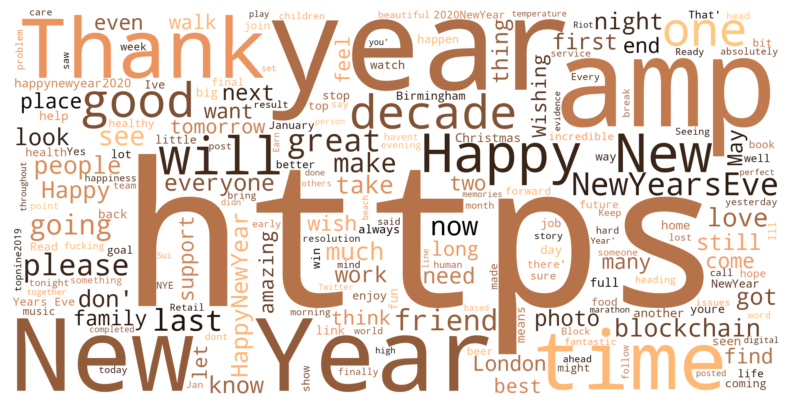

In [16]:
# The cleaned_file variable might also be used as data_source attribute value
# please wait for a while for the word cloud to appear.

vis_model = topic_visualise.Wordcloud(data_source=cleaned_file,text_column='text',save_image=False)
vis_model.visualize()

In [15]:
# cleaned_file variable might also be used as dataset_source attribute value

model = topic_model.TopicModeling(num_topics=10, dataset_source=cleaned_file,
learning_rate=0.001, batch_size=32, activation='softplus', num_layers=3, num_neurons=100,
dropout=0.2, num_epochs=100, save_model=False, model_path=None, train_model='NeuralLDA',evaluation=['topicdiversity','invertedrbo','jaccardsimilarity'])

saved_model = model.run()

100%|█████████████████████████████████████████| 244/244 [00:02<00:00, 82.85it/s]


created vocab
2143
Epoch: [1/100]	Samples: [168/16800]	Train Loss: 139.1624988374256	Time: 0:00:00.020384
Epoch: [1/100]	Samples: [37/3700]	Validation Loss: 126.45367596600506	Time: 0:00:00.001801
Epoch: [2/100]	Samples: [336/16800]	Train Loss: 139.2290743873233	Time: 0:00:00.018791
Epoch: [2/100]	Samples: [37/3700]	Validation Loss: 126.04528973553631	Time: 0:00:00.001667
Epoch: [3/100]	Samples: [504/16800]	Train Loss: 136.91680908203125	Time: 0:00:00.020346
Epoch: [3/100]	Samples: [37/3700]	Validation Loss: 125.8714698585304	Time: 0:00:00.001540
Epoch: [4/100]	Samples: [672/16800]	Train Loss: 137.86346508207777	Time: 0:00:00.015434
Epoch: [4/100]	Samples: [37/3700]	Validation Loss: 125.87820682010135	Time: 0:00:00.001718
Epoch: [5/100]	Samples: [840/16800]	Train Loss: 138.15579804920014	Time: 0:00:00.015539
Epoch: [5/100]	Samples: [37/3700]	Validation Loss: 126.04027660472973	Time: 0:00:00.001889
Epoch: [6/100]	Samples: [1008/16800]	Train Loss: 136.0210709344773	Time: 0:00:00.016341
E

In [14]:
# The cleaned_file variable might also be used as data_source attribute value
# The saved_model variable might also be used as the model_source attribute value, for example, model_source = saved_model

data_source = cleaned_file
model_source = saved_model
topic_mapper.TopicMapper(data_source, model_source)

interactive(children=(Dropdown(description='Select Topic To Visualize: <br>', options=(' ', 'validate', 'seek'…

Button(description='Export Map as HTML', style=ButtonStyle())

Output()